<h1>Phase 2 (EDL - Data Analysis Phase)</h1>
<h3>1. Open new Jupyter notebook</h3>

<h3>2. Import required libraries</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>3. Read your cleaned csv which you did in phase 1</h3>

In [2]:
df = pd.read_csv("clean_data.csv")

<h3>4. Shape the data</h3>

In [3]:
print(f"rows: {df.shape[0]}, columns:{df.shape[1]}")#use shape to show the number of rows and columns

rows: 1247, columns:10


<h3>5. Show first five records</h3>

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h3>6. Show all columns of the dataframe</h3>

In [5]:
for col in df.columns:#print column names
    print(col)

Name
Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


<h3>7. Show last 5 five rows</h3>

In [6]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1242,Ninja Hattori Kun: Ninja wa Shuugyou Degogiru ...,NES,1986,Platform,Hudson Soft,0.00,0.00,1.50,0.00,1.5
1243,WWF No Mercy,N64,2000,Fighting,THQ,1.20,0.27,0.02,0.02,1.5
1244,Ice Climber,NES,1985,Platform,Nintendo,0.46,0.10,0.92,0.02,1.5
1245,Star Wars: The Force Unleashed II,PS3,2010,Action,LucasArts,0.80,0.49,0.00,0.21,1.5
1246,Pac-Man World,PS,1998,Action,Namco Bandai Games,1.21,0.14,0.10,0.04,1.5


<h3>8. Describe the data.</h3>

In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,2004.823577,1.832422,1.097546,0.475501,0.348637,3.754010
std,7.281278,2.393796,1.493308,0.956197,0.584762,4.430869
min,1980.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,2001.000000,0.850000,0.410000,0.000000,0.100000,1.830000
50%,2006.000000,1.300000,0.750000,0.060000,0.210000,2.470000
75%,2010.000000,2.030000,1.270000,0.515000,0.380000,3.885000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000


<h3>9. Group the sales data of each region on Year_of_Release and plot the same</h3>
<h4>(It should show which region sales was at peak on which year of release)</h4>

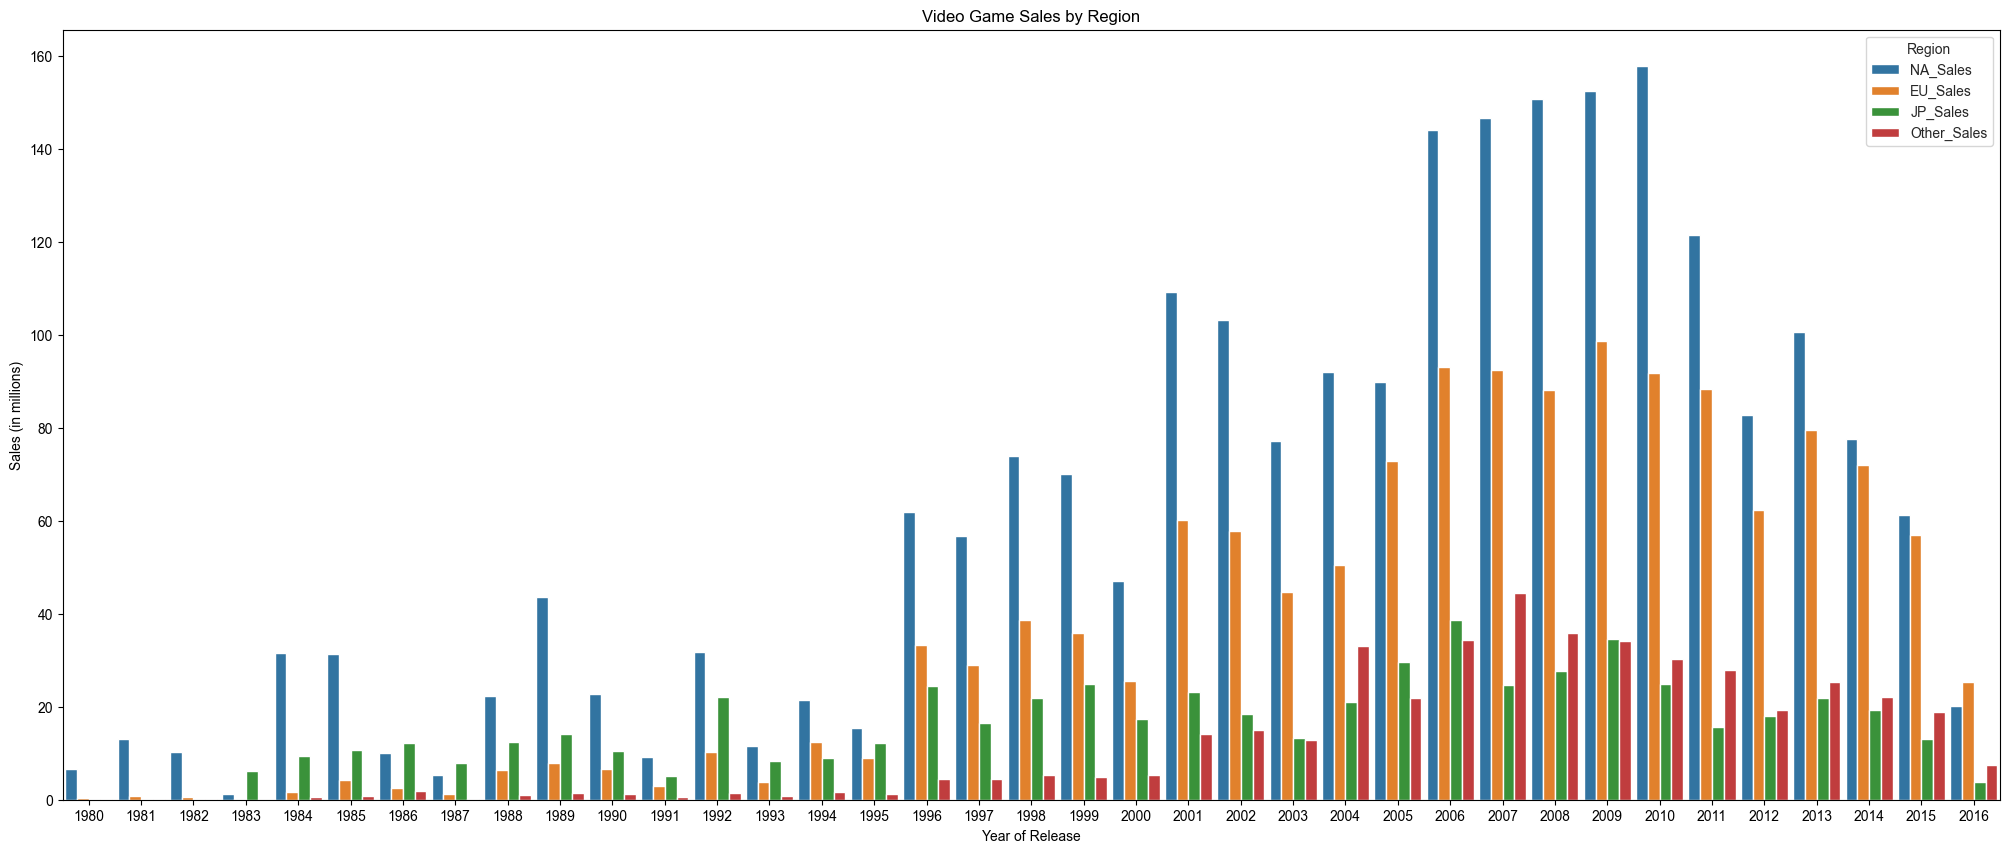

In [8]:
# Group the data by Year_of_Release and sum the sales for each region
sales_by_year = df.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the data to a long format for Seaborn
melted_sales = pd.melt(sales_by_year, id_vars=['Year_of_Release'], var_name='Region', value_name='Sales')

# Create a figure and axis object with a specified width
fig, ax = plt.subplots(figsize=(25, 10))

# Create a bar plot using Seaborn
sns.set_style("whitegrid")
sns.barplot(x='Year_of_Release', y='Sales', hue='Region', data=melted_sales, width=0.9)#set width to 0.9 so there would be less padding between the years resulting in wider bars


# Set the plot title and axis labels
plt.title('Video Game Sales by Region')
plt.xlabel('Year of Release')
plt.ylabel('Sales (in millions)')

# Display the plot
plt.show()


<h3>10. Group North American, Japan, European & Other region sales data as
per Genre and plot it</h3> <h4>(It should show highest of region according to game
category , ex- NA_Sales is highest in Adventure category , plot kind
should be bar)</h4>

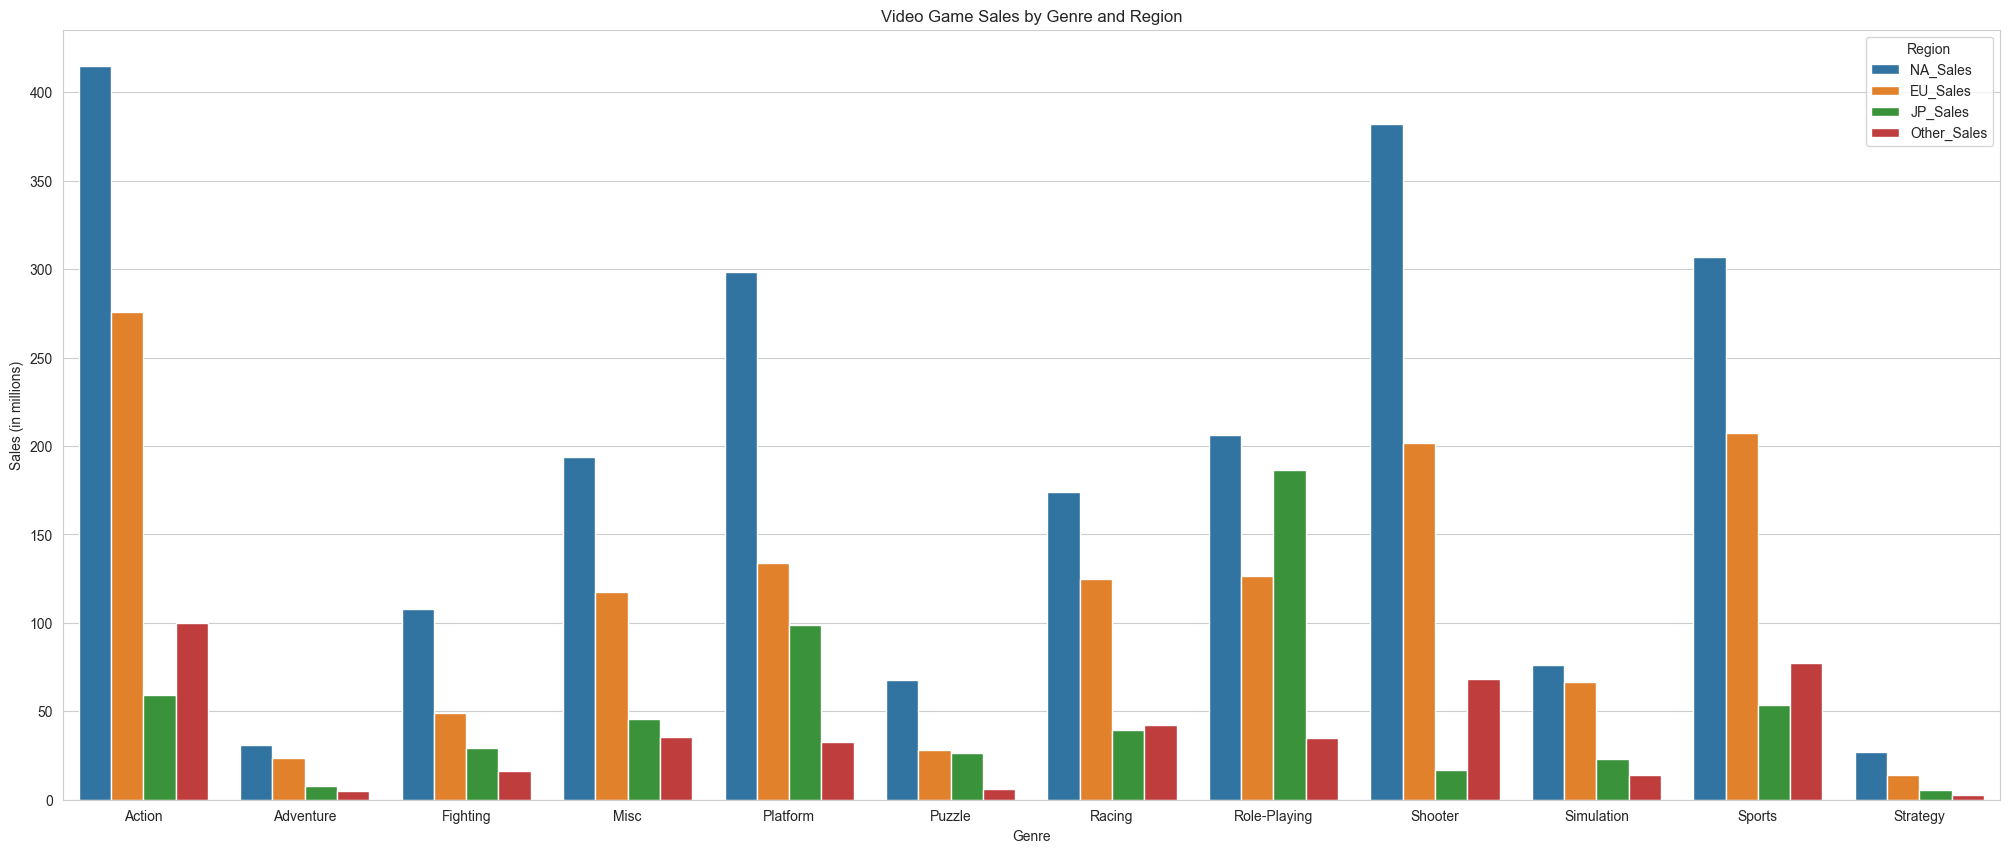

In [9]:
# Group the data by Genre and sum the sales for each group
sales_by_genre_region = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the data to a long format for Seaborn
melted_sales = pd.melt(sales_by_genre_region, id_vars=['Genre'], var_name='Region', value_name='Sales')

# Create a figure and axis object with a specified width
fig, ax = plt.subplots(figsize=(25, 10))

# Create a bar plot using Seaborn
sns.set_style("whitegrid")
sns.barplot(x='Genre', y='Sales', hue='Region', data=melted_sales)

# Set the plot title and axis labels
plt.title('Video Game Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')

# Display the plot
plt.show()



<h3>11. Group North American, Japan, European & Other region sales data as
per Platform and plot it</h3> <h4>(Should show sales as per "Platform genre" , plot
kind should be bar )</h4>

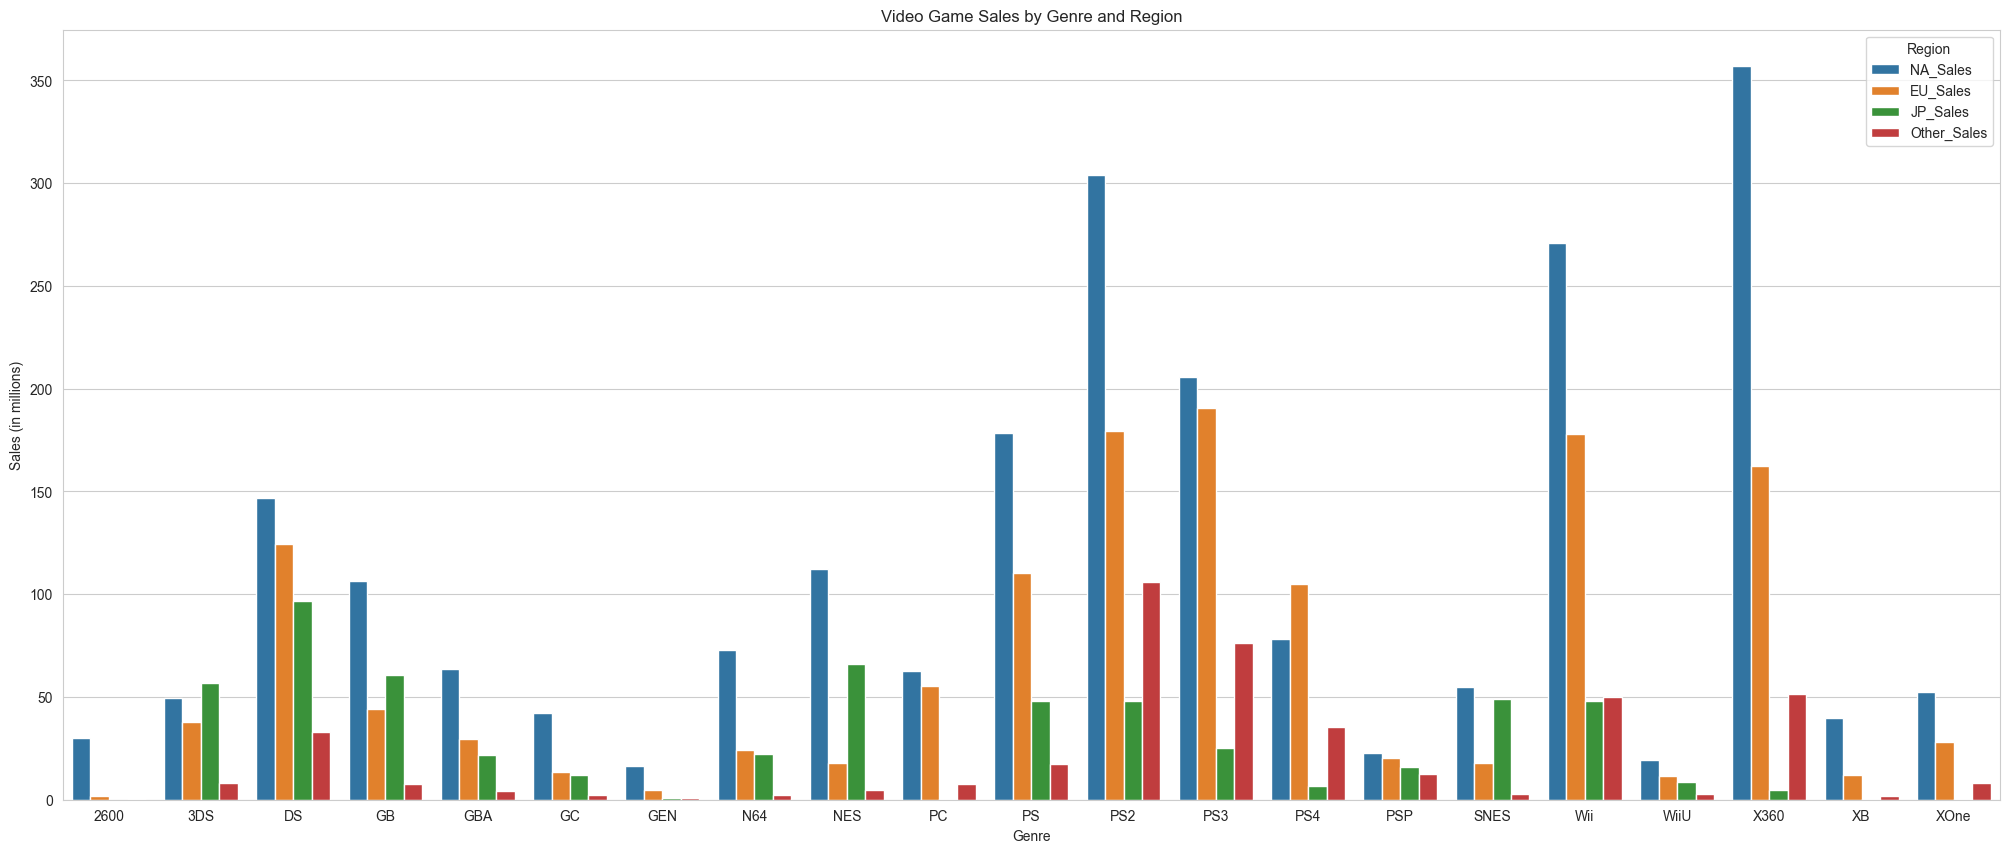

In [10]:
# Group the data by platform and sum the sales for each group
sales_by_platform_genre = df.groupby(['Platform'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the data to a long format for Seaborn
melted_sales = pd.melt(sales_by_platform_genre, id_vars=['Platform'], var_name='Region', value_name='Sales')

# Create a figure and axis object with a specified width
fig, ax = plt.subplots(figsize=(25, 10))

# Create a bar plot using Seaborn
sns.set_style("whitegrid")
sns.barplot(x='Platform', y='Sales', hue='Region', data=melted_sales)

# Set the plot title and axis labels
plt.title('Video Game Sales by Platform and Region')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')

# Display the plot
plt.show()

<h3>12. Plot the Sales in all regions as per Platform.</h3> <h4>You need to create a
boxplot for that which will show the distribution of sales as per platform</h4>

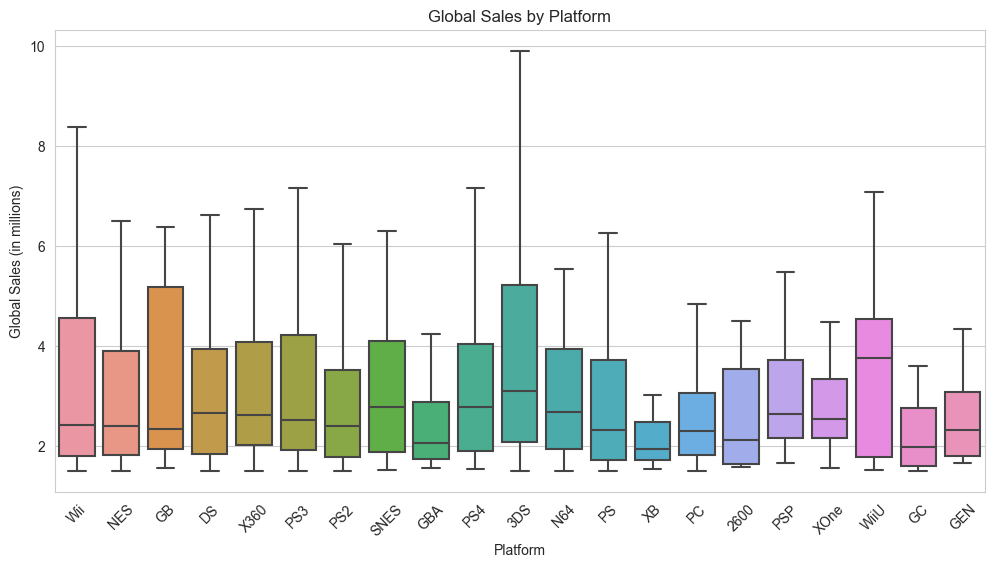

In [11]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot using Seaborn
sns.boxplot(x='Platform', y='Global_Sales', data=df, showfliers=False)#showflies is set to false to hide the outliers

# Set the plot title and axis labels
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


<h3>13. Find out which Genre games are sold in highest numbers</h3> <h4>(create a
countplot of seaborn which could do that)</h4>

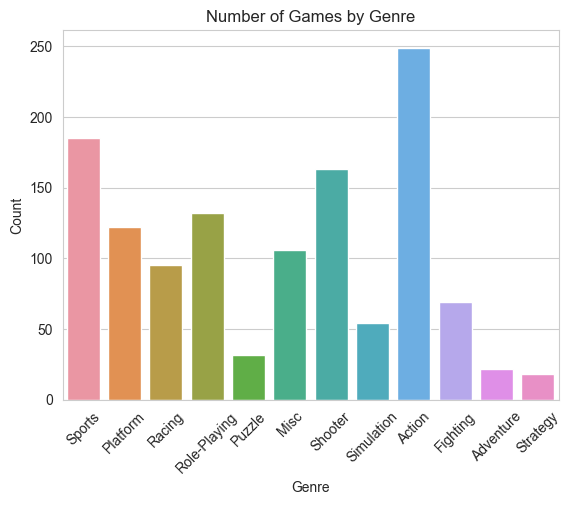

In [12]:
# Create a countplot of the 'Genre' column using Seaborn
sns.set_style("whitegrid")
sns.countplot(x='Genre', data=df)

# Set the plot title and axis labels
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


<h3>14. Try to find out global sales as per Genre</h3><h4>(create a barplot of seaborn
for that)</h4>

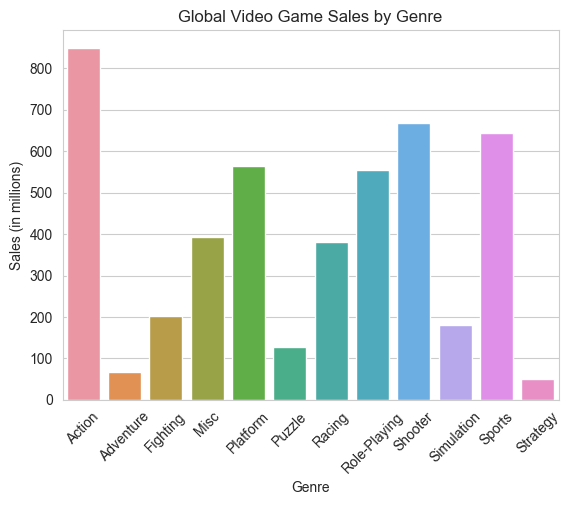

In [13]:
# Group the data by Genre and sum the global sales
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Create a barplot using Seaborn
sns.set_style("whitegrid")
sns.barplot(x='Genre', y='Global_Sales', data=sales_by_genre)

# Set the plot title and axis labels
plt.title('Global Video Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()
